In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import vizlib
import matplotlib.pyplot as plt
import lasagne
import theano
import nolearn.lasagne
import time
import numpy as np

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.frameon'] = False
# Have trouble importing? Make sure the right conda environment is setup.
# > source activate conda
# and then restart the notebook

if theano.config.device == 'cpu':
    import warnings
    warnings.warn('Theano is using the cpu. Make sure .theanorc is correctly configured.')


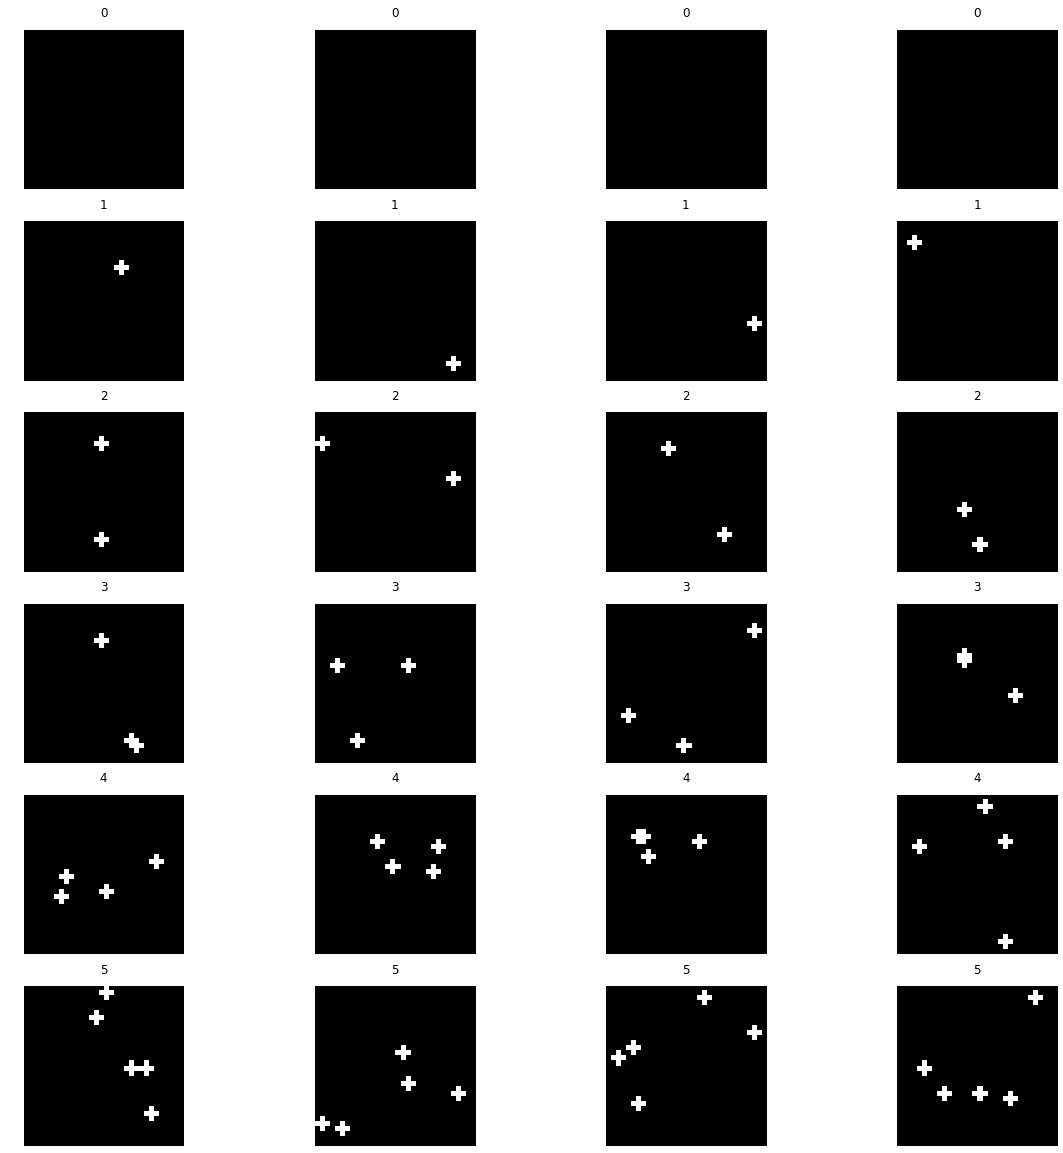

In [23]:
data = vizlib.data.counting_2d().show_sample()

In [24]:
# Since the size is constant,  a network should easily be able to recognize this using a single 3x3 filter.
from lasagne.layers import *

input_layer = InputLayer((None, ) + data.X.shape[1:])
conv_layer = Conv2DLayer(input_layer, num_filters=1, filter_size=3)
output_layer = DenseLayer(conv_layer, num_units=data.y.max() + 1, nonlinearity=lasagne.nonlinearities.softmax)

In [18]:
t0 = time.time()
net = nolearn.lasagne.NeuralNet(
    layers=output_layer,
    
    update_learning_rate = 1e-2,
    update_momentum = 0.9,
    
    #verbose=1,
)
net.fit(data.X, data.y)
t1 = time.time()
# timings (have to restart the kernel and modify the config to get these results)
# on romulus:
# (gpu, float32) 130
# (gpu, float64) 61
# (cpu, float32) 40
# on elitebook 8570w
# (cpu, float32) 58
# (gpu, float32) 253
# Why is this so slow???

print 'Elapsed:', t1 - t0

Elapsed: 20.3829729557


In [ ]:
# Presumably the above is very slow because nothing is placed in shared variables.
# This would mean that each minibatch has to be copied to the GPU.
# Now that we have a good GPU with lots of memory, we should be able to just dump the dataset on the GPU,
# and keep it there.
# I tried to integrate this shared variable idea with nolearn.lasagne.
# Unfortunately I found no way to make it work without opening the code.
